In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from scikeras.wrappers import KerasRegressor

c:\Users\riven\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\riven\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\riven\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("Predict_ready_df")

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1.1', 'timestamp', 'station_id', 'bike_id',
       'idle_time', 'bike_count', 'temperature', 'windspeed', 'rain', 'hour',
       'IsWeekday', 'month', 'near_bus_station', 'near_school',
       'near_leisure_spots', 'date', 'IsHoliday', 'season', 'is_night',
       'is_day', 'is_evening', 'coordinates', 'bike_freq'],
      dtype='object')

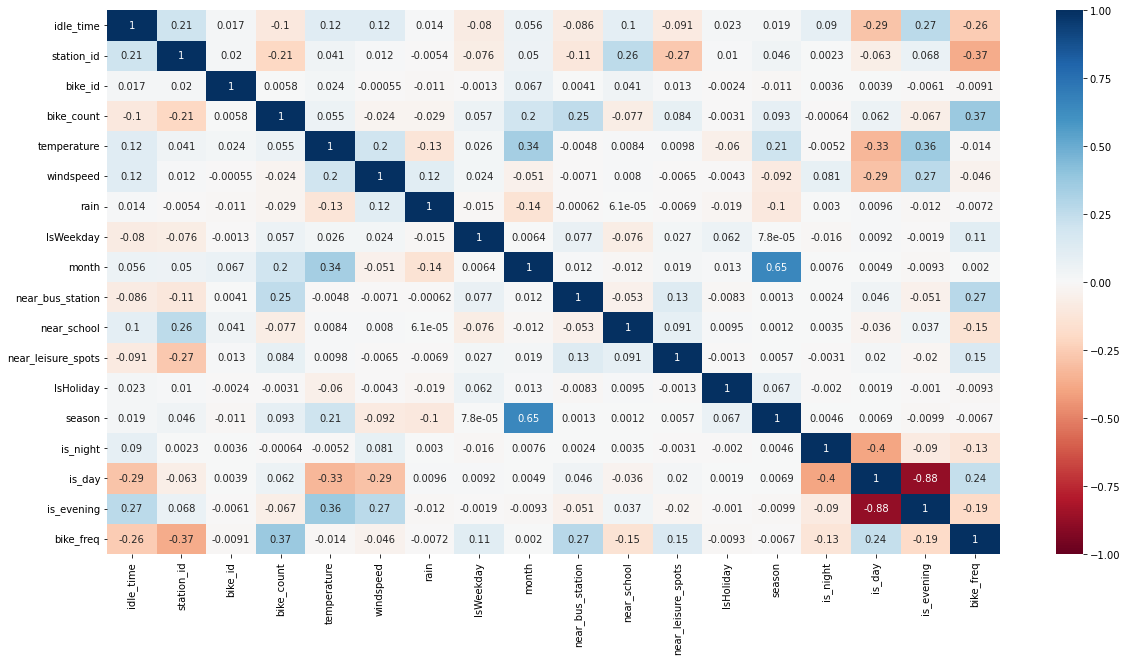

In [5]:
features =['idle_time','station_id', 'bike_id',
        'bike_count', 'temperature', 'windspeed', 'rain',
       'IsWeekday', 'month', 'near_bus_station', 'near_school',
       'near_leisure_spots', 'IsHoliday', 'season', 'is_night',
       'is_day', 'is_evening', 'bike_freq'
       
       ]

used = df[features]
plt.figure(figsize=(20, 10))
corr = used.corr()
# Create the heatmap
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

In [4]:
# xp = df[['bike_count', 
#        'temperature', 'windspeed','month_1', 'month_2', 'month_3', 'month_4', 'month_5',
#        'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
#        'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
#        'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
#        'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
#        'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
#          'rain', 'hour', 'IsWeekday',
#        'near_bus_station', 'near_school', 'near_leisure_spots', 'IsHoliday',
#        'season'
#        ]].values

xp = df[['bike_freq','bike_count', 'station_id', 'temperature','near_school','IsHoliday', 'rain', 'IsWeekday', 'is_night',
       'is_day', 'is_evening'
       
       ]].values

yp= df['idle_time'].values

In [55]:
sample_set = df[['bike_freq','temperature', 'station_id','near_school','is_night',
       'is_day','idle_time' ]].values

In [56]:
sample_size = 10000
random_indices = np.random.choice(sample_set.shape[0], size=sample_size, replace=False)
sample = sample_set[random_indices,:]

xs = sample[:,:7]
ys = sample[:,7:]

In [5]:
X_train_val, X_test, y_train_val, y_test = train_test_split(xp, yp, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

In [6]:
y_train_log = np.log1p(y_train)

In [9]:
y_test_log = np.log1p(y_test)

# Scaling features

In [5]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
# X_train[:,:3] = scaler.fit_transform(X_train[:,:3])
# X_test[:,:3] = scaler.transform(X_test[:,:3])
# X_val[:,:3] = scaler.transform(X_val[:,:3])
# X_train = scaler.fit_transform(X_train)




In [11]:
X_test

array([[2.77063512e-02, 4.54545455e-01, 4.92537313e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.07122654e-04, 4.54545455e-01, 2.98507463e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.57174081e-01, 3.93939394e-01, 3.28358209e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.61635382e-02, 3.33333333e-01, 2.23880597e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.97840062e-03, 3.63636364e-01, 3.28358209e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.03030303e-01, 3.58208955e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# Polynomial transformation

In [6]:
from sklearn.preprocessing import PolynomialFeatures
degree = 3
poly = PolynomialFeatures(degree= degree,include_bias= False)
# poly_fts_train = poly.fit_transform(X_train[:,:3])
# poly_fts_test = poly.transform(X_test[:,:3])
# poly_fts_val = poly.transform(X_val[:,:3])






In [15]:
X_train[:,:3] = scaler.fit_transform(X_train[:,:3])
X_val[:,:3] = scaler.fit_transform(X_val[:,:3])

In [7]:

poly_fts_test = poly.fit_transform(X_test)

poly_fts_train = poly.fit_transform(X_train[:,:3])
non_poly_train = X_train[:,3:]
poly_train = np.concatenate((poly_fts_train,non_poly_train),axis =1)


poly_fts_val = poly.fit_transform(X_val)

poly_fts_val = poly.fit_transform(X_val[:,:3])
non_poly_val = X_val[:,3:]
poly_val = np.concatenate((poly_fts_val,non_poly_val),axis =1)


In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15, random_state=42)
rf.fit(poly_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=42)

In [21]:
y_pred = rf.predict(poly_val)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5.134541397591724


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [None, 5, 10]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(poly_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_model)
print(best_params)

In [81]:

poly_fts_xs = poly.fit_transform(xs[:,:2])
non_poly_xs = xs[:,2:]
poly_xs = np.concatenate((poly_fts_xs,non_poly_xs),axis =1)


In [82]:
poly_xs.shape

(10000, 140)

In [84]:
non_poly_train = X_train[:,2:]
non_poly_test = X_test[:,2:]
non_poly_val = X_val[:,2:]




In [85]:
poly_train = np.concatenate((poly_fts_train,non_poly_train),axis =1)
poly_test = np.concatenate((poly_fts_test,non_poly_test),axis =1)
poly_val = np.concatenate((poly_fts_val,non_poly_val),axis =1)



In [10]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)


DummyRegressor()

In [12]:
poly_train.shape

(1555735, 63)

# Neural network

In [54]:

# define base model

 # create model
model = Sequential()
model.add(Dense(10, input_shape=(126,), kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))




model.add(Dense(1, kernel_initializer='normal'))
 # Compile model
model.compile(loss='mean_squared_error', optimizer='adam'
             )


In [55]:
model.fit(poly_xs,ys, batch_size =32, epochs = 50)

Epoch 1/50
313/313 [==============================] - 2s 2ms/step - loss: 19073.0625
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 15718.6240
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 14755.4590
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 14187.1631
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 13924.9150
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 13759.3779
Epoch 7/50
313/313 [==============================] - 1s 3ms/step - loss: 13684.6094
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 13634.7666
Epoch 9/50
313/313 [==============================] - 1s 2ms/step - loss: 13577.8398
Epoch 10/50
313/313 [==============================] - 1s 2ms/step - loss: 13534.0752
Epoch 11/50
313/313 [==============================] - 1s 2ms/step - loss: 13508.1836
Epoch 12/50
313/313 [==============================] - 1s 2ms/s

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold, scoring='neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))


# Polynomial regression

In [ ]:
# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_train, y_train)
print(regression_model.coef_ ,regression_model.intercept_)
regression_model.coef_
regression_model.intercept_


[ 8.10013809e+09 -4.04965259e+09 -4.05048550e+09 -1.73013997e+09
 -1.73013997e+09 -1.73013997e+09] 1730139972.9410267


1730139972.9410267

# Regularization Regression (Ridge)

In [93]:
from sklearn.linear_model import Ridge

# initialize model
model_L2 = Ridge(alpha = 0.1, solver = 'lsqr') # select least squares regression as solver

# train model
model_L2.fit(poly_xs, ys)


print("Coefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )

Coefficients  [[-1.93829794e-19  1.97320592e-19  2.49401439e-19 -5.63802928e-19
  -9.28024628e-20 -5.19447619e-20  2.44383268e-19  2.10782341e-19
   2.27393688e-19 -2.63448966e-18 -9.35963740e-20  1.05198847e-19
  -2.44509590e-19 -7.69165701e-20 -2.36985982e-19  1.01043991e-18
   5.97067490e-19  4.95196011e-19  7.71614312e-19 -1.33295501e-17
  -6.08286020e-19  2.94135251e-19 -4.93314545e-19 -5.86342362e-20
  -4.48275601e-19 -4.80002170e-19 -1.48425574e-19 -1.71540088e-19
  -3.03875507e-19  2.32735935e-18  1.16024302e-18  7.52218142e-19
   8.58727013e-19  1.60314551e-18 -7.17582181e-17 -3.65597539e-18
   1.10540833e-18 -2.52952922e-18 -4.95350130e-19 -2.21699228e-18
  -4.72491774e-19  1.03901491e-19 -4.65047551e-20 -5.47692215e-21
  -1.24866050e-18 -3.19680176e-19 -3.66416449e-19 -2.96163360e-19
  -1.00667115e-18  8.21897026e-18  3.57071904e-18  2.13230261e-18
   1.63933722e-18  2.23030868e-18  5.53676237e-18 -4.00184948e-16
  -2.35617059e-17  3.49462564e-18 -1.34378603e-17 -2.93631370e

# Regularization Regression (Lasso)

In [ ]:
from sklearn.linear_model import Lasso

model_L1 = Lasso(alpha = 0.00001)

model_L1.fit(poly_train, y_train)

print("Coefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )

## GLM regression (Log link function)

In [66]:
from sklearn.linear_model import PoissonRegressor
pr = PoissonRegressor(alpha=0.1)
pr.fit(X_train, y_train)
print("Coefficients ", pr.coef_, "\nIntercept ", pr.intercept_ )

Coefficients  [-0.00032441] 
Intercept  0.45513176680271


In [85]:
poly_val.shape

(4156794, 3)

In [34]:
def plot_poisson_regression_performance ():

    err_train = []
    err_cv = []
    
    

    for alpha in np.logspace(-20,-10,20):

        
        
        

        # fit model
        pr = PoissonRegressor(alpha= alpha) # select least squares regression as solver
        pr.fit(X_train, y_train)
    
        # compute errors
        err_train.append(mean_squared_error(pr.predict(X_train), y_train))
        err_cv.append(mean_squared_error(pr.predict(X_val), y_val))


    plt.figure(figsize = (8,6))
    plt.loglog(np.logspace(-20,-10,20), err_train, np.logspace(-20,-10,20), err_cv)
    plt.legend(["Training", "Validation"])
    plt.xlabel("$\lambda$ (or alpha in scikit learn terms)")
    plt.ylabel("Mean squared error")
    plt.show()

In [35]:
plot_poisson_regression_performance()

c:\Users\riven\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
c:\Users\riven\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
c:\Users\riven\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

KeyboardInterrupt: 

In [23]:

test_pred = rf.predict(poly_test)

print("Test set performance:")

print("MAE:",mean_absolute_error(y_test, test_pred))
print("RMSE:",(mean_squared_error(y_test, test_pred))**(0.5))  
print("R2:",r2_score(y_test,test_pred))

NameError: name 'poly_test' is not defined

In [117]:
test_pred.max()

3.1349278390407562

ValueError: x and y must be the same size

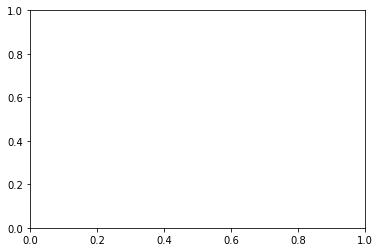

In [118]:
plt.scatter(X_test,y_test,marker ="x",color = "red")
plt.scatter(X_test,test_pred,marker ="o",color ="blue")